# Generating Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0,0],[[1,.75],[.75,1]],num_observations)
x2 = np.random.multivariate_normal([1,4],[[1,.75],[.75,1]],num_observations)

simulated_features = np.vstack((x1,x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),np.ones(num_observations)))


### Let's see how it looks

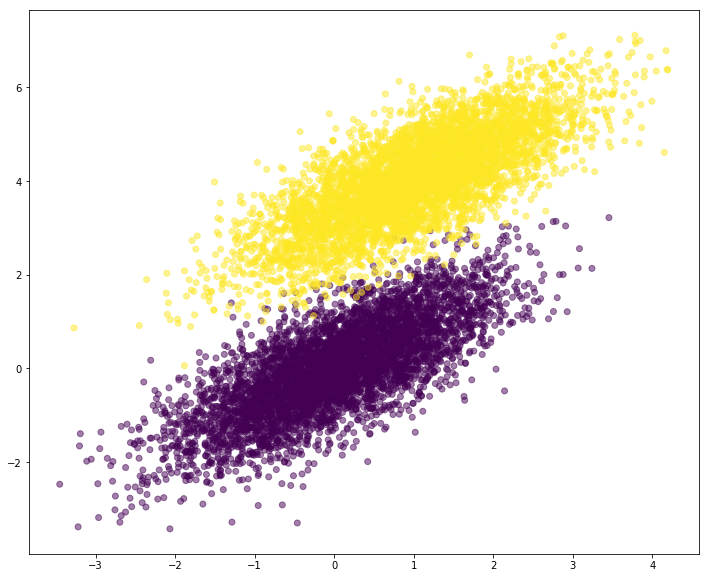

In [4]:
plt.figure(figsize=(12,10))
plt.scatter(simulated_features[:, 0], simulated_features[:, 1],
            c = simulated_labels, alpha = .5)

# Picking a Link Function

In [5]:
# The link function in case of logistic regression is sigmoid

def sigmoid(scores):
    return 1/(1+np.exp(-scores))

# Maximizing the Likelihood

### Calculating the Log-Likelihood

#### In case of Log-Likelihood, we try to maximize it using Gradient Ascent theorem

\begin{equation} ll = \sum_{i=1}^{N}y_{i}\beta ^{T}x_{i} - log(1+e^{\beta^{T}x_{i}}) \end{equation}

In [6]:
def log_likelihood(features,target,weights):
    scores = np.dot(features,weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

# Building the Logistic Regression Function

### Gradient

\begin{equation} \bigtriangledown ll = X^{T}(Y - Predictions) \end{equation}

In [7]:
def logistic_regression(features, target, steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [8]:
weights = logistic_regression(simulated_features, simulated_labels,
            steps = 300000, learning_rate = 5e-5, add_intercept=True)

-4346.264779152365
-148.7067227680535
-142.9649362310784
-141.5453030715737
-141.060319659308
-140.87031585891606
-140.79025912753812
-140.75505002269915
-140.73914503180958
-140.7318349891588
-140.7284366669482
-140.7268447125533
-140.7260950895047
-140.72574086052296
-140.72557306887177
-140.72549345786172
-140.72545564250743
-140.7254376661433
-140.72542911609156
-140.72542504794777
-140.725423111817
-140.72542219020235
-140.7254217514527
-140.7254215425613
-140.7254214431011
-140.72542139574287
-140.7254213731925
-140.7254213624546
-140.7254213573414
-140.72542135490647


In [9]:
weights

array([-14.09225541,  -5.05899648,   8.28955762])

# Comparing with sklearn's Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_features, simulated_labels)

print(weights)

[-14.09225541  -5.05899648   8.28955762]


# Accuracy

In [11]:
data = np.hstack((np.ones((simulated_features.shape[0], 1)),
                                 simulated_features))
final_scores = np.dot(data, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clf.score(simulated_features, simulated_labels)))

Accuracy from scratch: 0.9948
Accuracy from sk-learn: 0.9948


## Values of some variables used earlier.....

In [12]:
x1

array([[-0.2015173 , -0.68335816],
       [ 0.37451947, -0.82808223],
       [-0.16189468, -1.24710655],
       ...,
       [ 0.68358239,  0.32790575],
       [-1.18059621, -1.24839032],
       [ 0.05648586,  0.10506597]])

In [13]:
x2

array([[-0.71536626,  3.19335079],
       [ 0.50565017,  3.87254139],
       [ 2.17195684,  5.25131939],
       ...,
       [ 2.32559622,  4.18132864],
       [ 0.24707288,  4.22940428],
       [ 1.71902244,  4.82535048]])

In [14]:
simulated_features[:, 0]

array([-0.2015173 ,  0.37451947, -0.16189468, ...,  2.3255963 ,
        0.24707289,  1.7190224 ], dtype=float32)

In [15]:
simulated_features[:, 1]

array([-0.6833582, -0.8280822, -1.2471066, ...,  4.181329 ,  4.2294044,
        4.8253503], dtype=float32)

In [16]:
simulated_labels

array([0., 0., 0., ..., 1., 1., 1.])